In [9]:
import pandas as ps
import numpy as np
import cv2     # for capturing videos
import math   
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import os

# New version for video processing

In [4]:
video_dir = "../data_pocus/cleaned_data_videos.nosync"
out_image_dir = "../data_pocus/cleaned_data_images"

### Make directories

In [ ]:
# make directories:
if not os.path.exists(out_image_dir):
    os.makedirs(out_image_dir)
if not os.path.exists(CROSS_VAL_DIR):
    os.makedirs(CROSS_VAL_DIR)   
for mod in ["covid", "pneunomia", "regular"]:
    if not os.path.exists(os.path.join(out_image_dir, mod)):
        os.makedirs(os.path.join(out_image_dir, mod))

## Videos to images - automatically select every x frame

Takes all videos from video_dir and writes the frames to out_image_dir

In [ ]:
# SET FRAMERATE
FRAMERATE = 2 # saves automatically 2 frames per second

In [ ]:
vid_files = os.listdir(video_dir)
for i in range(len(vid_files)):
    
    # skip unnecessary files
    if vid_files[i][0]==".":
        # DStore etc
        continue
    
    # define video path
    # print("video", vid_files[i], "number ",i, "out of ", len(vid_files))
    video_path = os.path.join(video_dir, vid_files[i])
    
    # determine label
    if vid_files[i][:3]=="Cov":
        label = "covid"
    elif vid_files[i][:3]=="Pne" or vid_files[i][:3]=="pne":
        label = "pneunomia"
    elif vid_files[i][:3]=="Reg":
        label = "regular"
    else:
        raise ValueError("Wrong label! "+ vid_files[i])
    out_path = os.path.join(out_image_dir, label)
    
    # copy if image
    if vid_files[i][-3:]=="jpg" or vid_files[i][-3:]=="png":
        shutil.copy(video_path, out_path)
        continue
    
    # read and write if video
    cap = cv2.VideoCapture(video_path)   # capturing the video from the given path
    frameRate = cap.get(5) #frame rate
    every_x_image = int(frameRate/FRAMERATE)
    print(vid_files[i], "framerate", cap.get(5),"width", cap.get(3), "height", cap.get(4), "number frames:", cap.get(7))
    print("--> taking every ", every_x_image, "th image")
    x=1
    while(cap.isOpened()):
        frameId = cap.get(1) #current frame number
        ret, frame = cap.read()
        if (ret != True):
            break
        if (frameId % every_x_image == 0):
            # storing the frames in a new folder named test_1
            filename = os.path.join(out_path, vid_files[i] +"_frame%d.jpg" % frameId)
            cv2.imwrite(filename, frame)
    cap.release()

# Script to select frames manually from one video

In [5]:
# define video path (ONE VIDEO)
video_path = "cleaned_data_videos/Cov-MSU-COVID Lung 2-Blines.mp4"
# define where to save outputs
out_image_dir = "new_test"
# how many frames do you want to check?
check_every = 2 # displays every second frame

already selected  0 frames


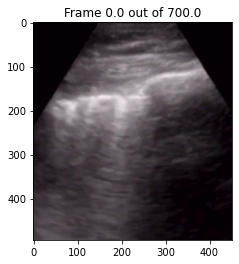

Take image? (No:0, Yes:1, Stop:2)  1
already selected  1 frames
last selected was frame 0.0


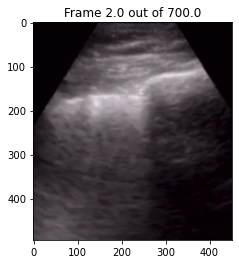

KeyboardInterrupt: Interrupted by user

In [10]:
# make subdirectories if they don't exist
for mod in ["covid", "pneunomia", "regular"]:
    if not os.path.exists(os.path.join(out_image_dir, mod)):
        os.makedirs(os.path.join(out_image_dir, mod))

out_name = "Cov-MSU-COVID Lung 2-Blines.mp4"

# determine label
if out_name[:3]=="Cov":
    label = "covid"
elif out_name[:3]=="Pne" or vid_files[i][:3]=="pne":
    label = "pneunomia"
elif out_name[:3]=="Reg":
    label = "regular"
else:
    raise ValueError("Wrong label! "+ vid_files[i])
# Final outpath: out directory plus the label
out_path = os.path.join(out_image_dir, label)

# read and write if frame is selected
cap = cv2.VideoCapture(video_path)   # capturing the video from the given path
decision=0
n_frames = cap.get(7)
selected_frames = []
while cap.isOpened() and decision!=2:
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    # only display every x frames (more diverse, not as much work)
    if frameId%check_every==0:
        print("already selected ", len(selected_frames), "frames")
        if len(selected_frames)>0:
             print("last selected was frame", selected_frames[-1])
        # display image
        plt.imshow(frame)
        plt.title("Frame "+str(frameId)+" out of "+str(n_frames))
        plt.show()
        decision = int(input("Take image? (No:0, Yes:1, Stop:2)  "))
        if decision==1:
            # storing the frames in a new folder named test_1
            filename = os.path.join(out_path, out_name +"_frame%d.jpg" % frameId)
            cv2.imwrite(filename, frame)
            selected_frames.append(frameId)
cap.release()

# Video dataset - Previous version

In [ ]:
from tqdm import tqdm

In [5]:
import os
path='enter your path\'

#Train
videos_train=os.listdir(path+'train\\')
train = pd.DataFrame()
train['video_name'] = videos_train
train = train[:-1]

#Test
videos_test=os.listdir(path+'test\\')
test = pd.DataFrame()
test['video_name'] = videos_test
test = test[:-1]


In [6]:
# storing the frames from training videos
for i in tqdm(range(train.shape[0])):
    count = 0
    videoFile = train['video_name'][i]
    cap = cv2.VideoCapture(path+'train\\'+videoFile)   # capturing the video from the given path
    frameRate = cap.get(5) #frame rate
    x=1
    while(cap.isOpened()):
        frameId = cap.get(1) #current frame number
        ret, frame = cap.read()
        if (ret != True):
            break
        if (frameId % math.floor(frameRate) == 0):
            # storing the frames in a new folder named train_1
            filename =path+'train_1/' + videoFile +"_frame%d.jpg" % count;count+=1
            cv2.imwrite(filename, frame)
    cap.release()
    


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:15<00:00,  1.52it/s]


In [82]:
# storing the frames from testing videos
for i in tqdm(range(test.shape[0])):
    count = 0
    videoFile = test['video_name'][i]
    cap = cv2.VideoCapture(path+'test\\'+videoFile)   # capturing the video from the given path
    frameRate = cap.get(5) #frame rate
    x=1
    while(cap.isOpened()):
        frameId = cap.get(1) #current frame number
        ret, frame = cap.read()
        if (ret != True):
            break
        if (frameId % math.floor(frameRate) == 0):
            # storing the frames in a new folder named test_1
            filename =path+'test_1/' + videoFile +"_frame%d.jpg" % count;count+=1
            cv2.imwrite(filename, frame)
    cap.release()

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:06<00:00,  1.76it/s]


## 10 fold cross validation

In [3]:
import os
os.listdir("train")

['Pneu-Atlas-pneumonia2.gif',
 'Pneu-Atlas-pneumonia.gif',
 'Reg-Atlas-lungcurtain.gif',
 'Reg-Butterfly.mp4',
 'Cov-Atlas+(45).gif',
 'Cov-Butterfly-COVID Skip Lesion.mp4',
 'Reg-Youtube.mp4',
 'Pneu-grep-pneumonia4.mp4',
 'Pneu-grep-pneumonia1.mp4',
 'pneu-everyday.gif',
 'Cov-MSU-COVID Lung 2-Blines.mp4',
 'Pneu-grep-pneumonia2.mp4',
 'pneu-gred-6.gif',
 'Cov-Atlas+(44).gif',
 'Cov-clarius.gif',
 'Reg-bcpocus.gif',
 'Cov-Atlas-Day+4.gif',
 'Reg-Atlas.gif',
 'Cov-Butterfly-COVID Lung 2.mp4',
 'Reg-NormalLungs.mp4',
 'pneu-radiopaeda.mp4',
 'Cov-Atlas-Day+2.gif',
 'Cov-grepmed-blines-pocus-.mp4',
 'Cov-grepmed3.mp4',
 'Cov-grepmed2.mp4']

In [4]:
os.listdir("test")

['Reg-Grep-Normal.gif',
 'Cov-Atlas-+(43).gif',
 'Cov-B_ConvexProb_score1.jpg',
 'Cov-C_Convex_Prob_score2.jpg',
 'Reg-nephropocus.mp4',
 'Cov-D_Convex_Prob_score3.jpg',
 'pneu-gred-7.gif',
 'Pneu-Atlas-pneumonia-AirBronch.gif',
 'Pneu-grep-pneumonia3.mp4',
 'Reg-Grep-Alines.mp4',
 'Cov-MSU-SkipLesions.mp4',
 'Cov-C_ConvexProb_score3.jpg',
 'Reg-Atlas-alines.gif',
 'Cov-Butterfly-COVID Lung 1.mp4',
 'Cov-Atlas-Day+1.gif',
 'Cov-Atlas-Day+3.gif']